# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [2]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")# as a np array

--2024-02-21 19:43:58--  https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.05s   

2024-02-21 19:43:58 (4.95 MB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



In [3]:
def update_centroids(data, classes, k):
  new_centroids = []
  for i in range(k):
    indices_in_cluster = np.where(classes == i)[0]
    data_points_in_cluster = data[indices_in_cluster]
    if len(data_points_in_cluster) > 0:
      centroid = data_points_in_cluster.mean(axis=0)
    else:
      centroid = np.random.choice(data.flatten(), size=data.shape[1])
    new_centroids.append(centroid)
  return np.array(new_centroids)

def mahalanobis_distance(x, y, P_inv):
  difference = x - y
  return np.sqrt(np.dot(np.dot(difference, P_inv), difference.T))

def kmeans_cluster(data, centroids=np.random.randn(5, 2), P=np.eye(2), num_iterations=100):
  n_samples = data.shape[0]
  n_clusters = centroids.shape[0]
  classes = np.random.choice(n_clusters, n_samples)
  PP_inv = np.linalg.inv(np.dot(P.T, P))

  for i in range(num_iterations):
    distances = np.array([[mahalanobis_distance(data_point, centroid, PP_inv)
                          for centroid in centroids] for data_point in data])
    classes = np.argmin(distances, axis=1)
    centroids = update_centroids(data, classes, n_clusters)

  return centroids, classes


def plot_data(data, centroids, classes):
  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(data[:, 0], data[:, 1], c=classes, s=50, cmap='viridis', alpha=0.6)
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*', edgecolor='black')
  plt.title('Data points and cluster centroids')
  plt.legend(*scatter.legend_elements(), title="Classes")
  plt.show()

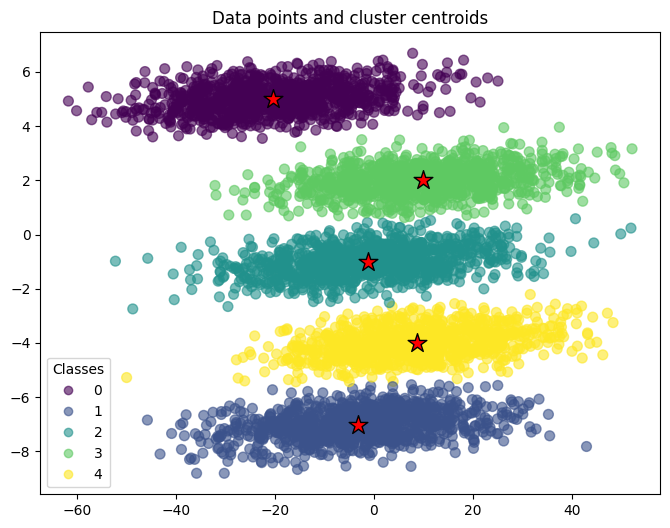

In [5]:
use_P = True #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])


centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)


In [7]:
def pca_1st(points):
  Cov = np.cov(points.T)
  eigval, eigvec = np.linalg.eig(Cov)
  eigorder = np.argsort(eigval)[::-1]
  sorted_eigvec = eigvec[:, eigorder]

  return sorted_eigvec[0]

print(pca_1st(all_data))


[0.99838317 0.05684225]


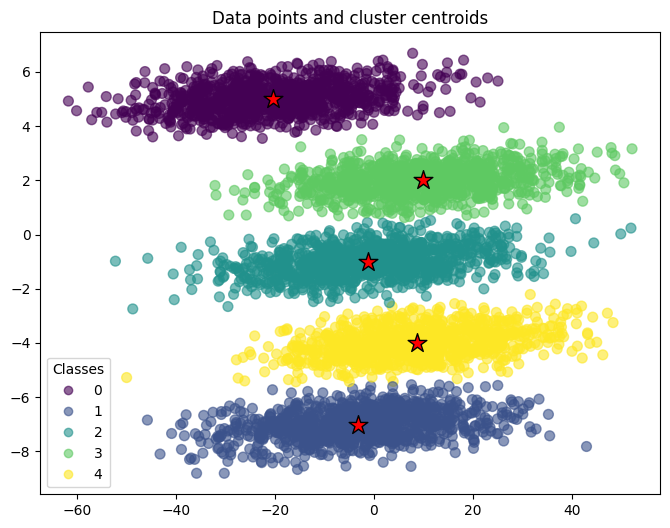

First principal component for all data : [ 0.99838317 -0.05684225]
First principal component for cluster 0: [0.99993527 0.01137789]
First principal component for cluster 1: [0.99992533 0.01222027]
First principal component for cluster 2: [0.99990986 0.01342629]
First principal component for cluster 3: [0.99993306 0.01157047]
First principal component for cluster 4: [0.99989374 0.01457781]


In [10]:
centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )

plot_data(all_data, centroids_, classes_)

def pca_1st(points):
    Cov = np.cov(points.T)
    eigval, eigvec = np.linalg.eig(Cov)
    eigorder = np.argsort(eigval)[::-1]
    sorted_eigvec = eigvec[:, eigorder]
    return sorted_eigvec[:, 0]


print(f"First principal component for all data : {pca_1st(all_data)}")

for i in range(5):
    cluster_points = all_data[classes_ == i]
    first_pc = pca_1st(cluster_points)
    print(f"First principal component for cluster {i}: {first_pc}")
